In [1]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [4]:
import nltk

In [2]:
# my* *의 의미는 앞에 my만 같으면 다불러온다.
all_files = glob.glob("./data_list/my*.xls")

In [3]:
all_files

['./data_list\\myCabinetExcelData (1).xls',
 './data_list\\myCabinetExcelData (2).xls',
 './data_list\\myCabinetExcelData (3).xls',
 './data_list\\myCabinetExcelData (4).xls',
 './data_list\\myCabinetExcelData (5).xls',
 './data_list\\myCabinetExcelData (6).xls',
 './data_list\\myCabinetExcelData (7).xls',
 './data_list\\myCabinetExcelData (8).xls',
 './data_list\\myCabinetExcelData (9).xls',
 './data_list\\myCabinetExcelData.xls']

In [8]:
all_files_data=[]

In [9]:
for file in all_files:
    data_frame =pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
95,NaN,96,Smart city big data analytics: An advanced review,"Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...",John Wiley & Sons Ltd,2019
96,NaN,97,A watchdog approach - name-matching algorithm ...,"Kirubakaran, Anusuya; Aramudhan, M.",Inderscience,2018
97,NaN,98,An intelligent approach to Big Data analytics ...,"Verma, Neha; Singh, Jatinder",Emerald Group Publishing Limited,2017
98,NaN,99,How organisations leverage Big Data: a maturit...,"Comuzzi, Marco; Patel, Anit",Emerald Group Publishing Limited,2016


In [10]:
all_files_data_concat=pd.concat(all_files_data,axis=0,ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
995,NaN,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017
996,NaN,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
997,NaN,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016
998,NaN,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018


In [11]:
all_title = all_files_data_concat['제목']
all_title

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
995    Guest Editorial: Big Media Data: Understanding...
996    Guest Editorial: Big Scholar Data Discovery an...
997    Guest Editorial: Big Media Data: Understanding...
998    Speed Up Big Data Analytics by Unveiling the S...
999          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [12]:
# iterator data : 반복되는 형태의 데이터 list, series, tuple  (반복자)
type(all_title)

pandas.core.series.Series

In [13]:
stopWords= set(stopwords.words('english'))
lemma= WordNetLemmatizer()

In [19]:
words= []
for title in all_title:
    # print(title)
    EnWords =re.sub(r"[^a-zA-Z]+"," ",str(title)) # [^a-zA-Z] 소문자부터 대문자까지 다포함해라
    # print(EnWords)
    EnWordsToken = word_tokenize(EnWords.lower()) # 여기서 word_tokenize로 리스트가 되기때문에 밑에도 리스트를해줘야한다.
    # print(EnWordsToken)
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # 이름이 없는 함수 익명함수,클로저
    # print(EnWordsTokenStop)
    EnWordsTokenStopLemma= [lemma.lemmatize(w) for w in EnWordsTokenStop]
    # print(EnWordsTokenStopLemma)
    words.append(EnWordsTokenStopLemma)

A =
EnWordsTokenStop = [W for w in EnWordsToken if w not in stopWords]

A코드와 
B코드는 같은 코드
A 메모리에 저장이안되고 바로쓰고 버리고
B 메모리에남기때문에 굳이 B 보단 A 가 메모리적으론 좋다 
B 방법이 익숙하다면 써도 상관무

B=
def call(EnWordsTocken):
    result = []
    for w in EnWordsToken:
        if w not in stopwords:
            result.append(w)
        return result

EnWordsTokenStopLemma= [lemma.lemmatize(w) for w in EnWordsTokenStop]
같은 코드 
def call(EnWordsTokenStop):
    result2 = []
    for w in EnWordsTokenStop:
         result2.append(lemma.lematize(w))     
    return result

In [20]:
print(words)

[['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data'], ['nosql', 'database', 'big', 'data'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application'], ['new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean'], ['five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics'], ['towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud'], ['large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation'], ['hierarc

In [31]:
# word2 =list(reduce(lambda x, y:x+y, words)) # 데이터타잎이 리스트면 굳이할필요없음
words2 =reduce(lambda x, y:x+y, words)

In [32]:
words2[:10]

['guest',
 'editorial',
 'big',
 'medium',
 'data',
 'understanding',
 'search',
 'mining',
 'part',
 'guest']

In [33]:
print(type(words2))

<class 'list'>


In [34]:
count =Counter(words2)

In [35]:
count

Counter({'guest': 12,
         'editorial': 17,
         'big': 1354,
         'medium': 11,
         'data': 1645,
         'understanding': 11,
         'search': 7,
         'mining': 40,
         'part': 1,
         'scholar': 3,
         'discovery': 13,
         'collaboration': 5,
         'analytics': 137,
         'web': 9,
         'parallel': 5,
         'computing': 25,
         'preserving': 2,
         'privacy': 17,
         'using': 57,
         'k': 7,
         'anonymisation': 1,
         'algorithm': 17,
         'nosql': 4,
         'database': 11,
         'computation': 2,
         'migration': 4,
         'new': 38,
         'approach': 44,
         'execute': 1,
         'bioinformatics': 2,
         'workflow': 3,
         'towards': 12,
         'real': 14,
         'time': 17,
         'platform': 19,
         'health': 37,
         'application': 25,
         'accurate': 3,
         'distributed': 18,
         'cluster': 2,
         'analysis': 67,
         

In [37]:
count.most_common(10)

[('data', 1645),
 ('big', 1354),
 ('analytics', 137),
 ('analysis', 67),
 ('based', 62),
 ('using', 57),
 ('system', 50),
 ('science', 50),
 ('management', 48),
 ('challenge', 47)]

In [38]:
word_count = dict()

for tag, counts in count.most_common(50): # 튜블이기때문에 키 벨류가있어서 tag 를써서 불러온다.
    if(len(str(tag))>1): # 데그에 길이체크 한글자 같은거 거를려고
        word_count[tag] = counts
print(word_count)

{'data': 1645, 'big': 1354, 'analytics': 137, 'analysis': 67, 'based': 62, 'using': 57, 'system': 50, 'science': 50, 'management': 48, 'challenge': 47, 'approach': 44, 'mining': 40, 'new': 38, 'research': 38, 'health': 37, 'model': 37, 'cloud': 34, 'smart': 34, 'learning': 33, 'opportunity': 31, 'processing': 30, 'technology': 28, 'small': 27, 'framework': 26, 'information': 26, 'computing': 25, 'application': 25, 'driven': 24, 'social': 24, 'issue': 24, 'quality': 23, 'network': 23, 'deal': 23, 'knowledge': 22, 'efficient': 22, 'review': 22, 'use': 22, 'era': 22, 'healthcare': 21, 'storage': 21, 'service': 21, 'perspective': 21, 'open': 20, 'platform': 19, 'survey': 19, 'making': 19, 'process': 19, 'distributed': 18, 'large': 18, 'environment': 18}


In [39]:
del word_count['big']
del word_count['data']

In [40]:
word_count.keys()

dict_keys(['analytics', 'analysis', 'based', 'using', 'system', 'science', 'management', 'challenge', 'approach', 'mining', 'new', 'research', 'health', 'model', 'cloud', 'smart', 'learning', 'opportunity', 'processing', 'technology', 'small', 'framework', 'information', 'computing', 'application', 'driven', 'social', 'issue', 'quality', 'network', 'deal', 'knowledge', 'efficient', 'review', 'use', 'era', 'healthcare', 'storage', 'service', 'perspective', 'open', 'platform', 'survey', 'making', 'process', 'distributed', 'large', 'environment'])

In [43]:
key_list = list(word_count.keys())
key_list[:10]
# 그래프에서는 순서대로 무슨의미인지 x축 들어가는거 

['analytics',
 'analysis',
 'based',
 'using',
 'system',
 'science',
 'management',
 'challenge',
 'approach',
 'mining']

In [42]:
sorted_keys_list =sorted(key_list) # sorted(key_list,
sorted_keys_list[:10]

['analysis',
 'analytics',
 'application',
 'approach',
 'based',
 'challenge',
 'cloud',
 'computing',
 'deal',
 'distributed']

In [44]:
dict2 ={'name':['홍길동','김길동','박길동'],'age':[100,200,300]}

In [45]:
dict2.keys()

dict_keys(['name', 'age'])

In [46]:
dict3 = { "분석" :245, "첼린지":100}

In [50]:
keys3=dict3.keys()
keys3

dict_keys(['분석', '첼린지'])

In [48]:
dict2.values()

dict_values([['홍길동', '김길동', '박길동'], [100, 200, 300]])

In [49]:
dict3.values()

dict_values([245, 100])

In [52]:
list_keys3=list(keys3)
list_keys3

['분석', '첼린지']

In [56]:
sorted(list_keys3,reverse=True)

['첼린지', '분석']

In [58]:
list_values3=list(dict3.values())
sorted(list_values3,reverse=True)

[245, 100]

위에코드 밑에 sorted 하는 이유를 보기위해 이거 이해잘하면 파이썬에 문제없다.

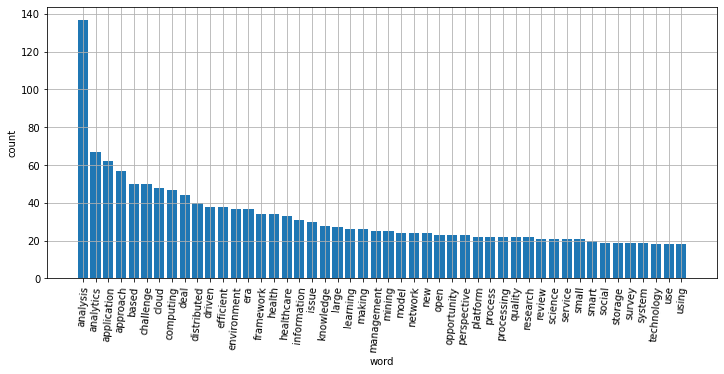

In [61]:
plt.figure(figsize=(12,5))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)

sorted_keys =sorted_keys_list
sorted_values = sorted(word_count.values(),reverse=True)
plt.bar(range(len(word_count)),sorted_values,align='center')
plt.xticks(range(len(word_count)),list(sorted_keys) ,rotation='85')
plt.show()